ERROR: Could not find a version that satisfies the requirement sckit-learn (from versions: none)
ERROR: No matching distribution found for sckit-learn


Saving global-meat-production newv2.csv to global-meat-production newv2 (6).csv
User uploaded file "global-meat-production newv2 (6).csv" with length 423252 bytes
         Country Code  Year  \
0        Bahamas  BHS  1961   
1         Brunei  BRN  1961   
2          Qatar  QAT  1961   
3  Faroe Islands  FRO  1961   
4         Tuvalu  TUV  1961   

   Meat, total | 00001765 || Production | 005510 || tonnes  
0                                             1260.7        
1                                             1289.8        
2                                             1769.2        
3                                                0.0        
4                                               30.0        
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14382 entries, 0 to 14381
Data columns (total 4 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0  

Text(0.5, 1.0, 'Meat Production Forecast')

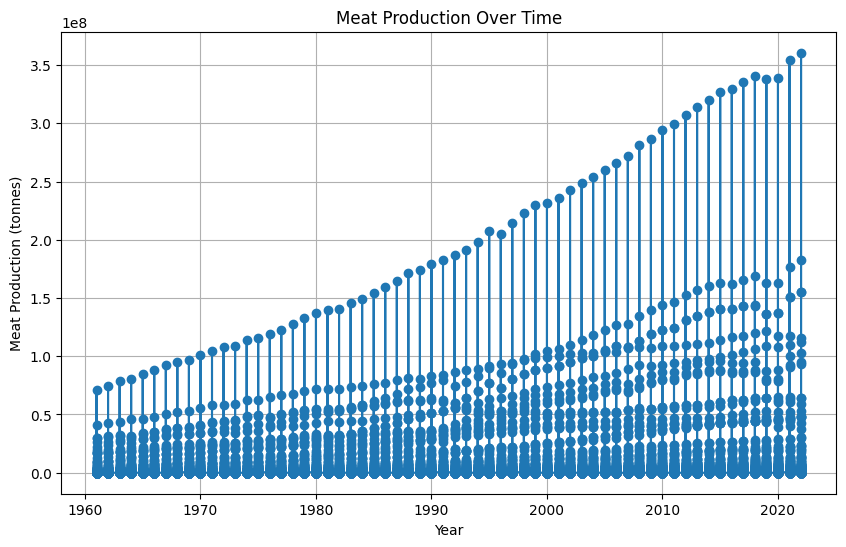

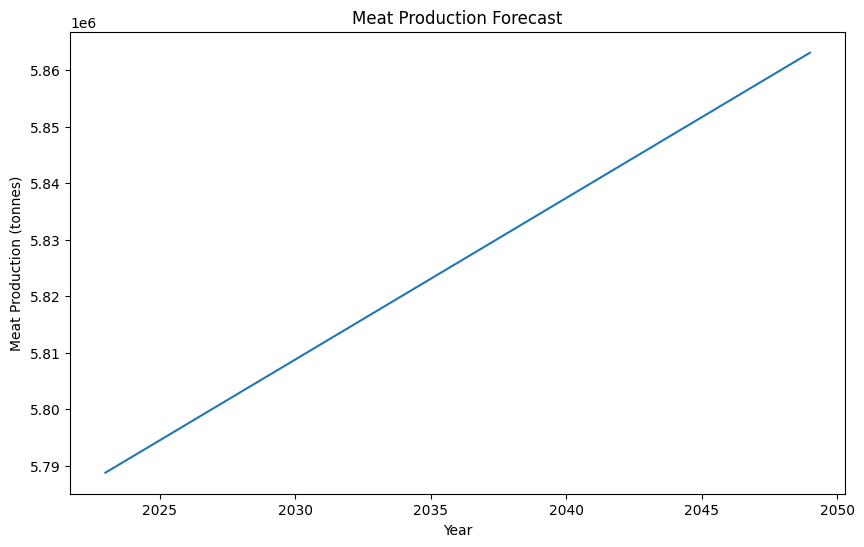

In [9]:
!pip install tensorflow
!pip install sckit-learn
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from google.colab import files
import tensorflow as tf
# Datei hochladen
uploaded = files.upload()

# Überprüfe die hochgeladenen Dateien
for file_name in uploaded.keys():
    print(f'User uploaded file "{file_name}" with length {len(uploaded[file_name])} bytes')

# Lade die hochgeladene CSV-Datei in ein Pandas DataFrame
df = pd.read_csv(next(iter(uploaded)))
print(df.head())
print(df.info())
print(df.describe())
print(df.columns)

# Bereinige den Spaltennamen für die Fleischproduktion
df.columns = ['Country', 'Code', 'Year', 'Meat_Production_tonnes']

# Gruppiere nach Ländern und berechne den Durchschnitt der Fleischproduktion
mean_meat_production_by_country = df.groupby('Country')['Meat_Production_tonnes'].mean()
print(mean_meat_production_by_country)

# Sortiere den DataFrame nach dem Index
df.sort_index(inplace=True)

# Pivot-Tabelle erstellen
pivot_df = df.pivot(index='Year', columns='Country', values='Meat_Production_tonnes')
print(pivot_df)

# Berechne den Durchschnitt der Fleischproduktion weltweit
overall_mean_meat_production = df['Meat_Production_tonnes'].mean()
print(f"Overall mean meat production: {overall_mean_meat_production} tonnes")

# Berechne das Land mit der höchsten und niedrigsten Fleischproduktion
highest_meat_production_by_country = df.groupby('Country')['Meat_Production_tonnes'].max()
print(highest_meat_production_by_country)

lowest_meat_production_by_country = df.groupby('Country')['Meat_Production_tonnes'].min()
print(lowest_meat_production_by_country)
meat_consumption_per_country = df.groupby('Country')['Meat_Production_tonnes'].sum()
print(meat_consumption_per_country)

meat_consumption_per_country = df.groupby('Country')['Meat_Production_tonnes'].sum()
print(meat_consumption_per_country)



# Meat Consumption Plot
plt.figure(figsize=(10, 6))
plt
plt.plot(df['Year'], df['Meat_Production_tonnes'], marker='o', linestyle='-')
plt.title('Meat Production Over Time')
plt.xlabel('Year')
plt.ylabel('Meat Production (tonnes)')
plt.grid(True)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])
future_years = np.arange(2023, 2050)
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(df['Year'], df['Meat_Production_tonnes'], epochs=100, verbose=0)
forecast_meat_production = model.predict(future_years)

# Plotten der Vorhersage
plt.figure(figsize=(10, 6))
plt.plot(future_years, forecast_meat_production, label='Forecasted Meat Production')
plt.xlabel('Year')
plt.ylabel('Meat Production (tonnes)')
plt.title('Meat Production Forecast')